In [1]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import csv
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
true_file = r"D:\vs code\.vscode\python\True.csv"
fake_file = r"D:\vs code\.vscode\python\Fake.csv"

In [3]:
true = pd.read_csv(true_file)
fake = pd.read_csv(fake_file)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\vs code\\.vscode\\python\\True.csv'

In [ ]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
# Use the the first 5000 data of true and fake dataset for building the model.
frames = [true.loc[:10000][:], fake.loc[:10000][:]]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.tail()

,title,text,subject,date,label
9996,President and First Lady Arrive in Texas: Serv...,Check out what s happening in Texas! President...,politics,"Sep 2, 2017",0
9997,Heaven’s Gatekeeper? Jesse Jackson Proclaims T...,Jesse Jackson thinks he s Heaven s gatekeeper ...,politics,"Sep 2, 2017",0
9998,First Lady Melania Trump Defies Critics…Rocks ...,The media will lose it again because Melania T...,politics,"Sep 2, 2017",0
9999,Watch Women’s March Activist: ‘Missing Black G...,Unbelievable! Women s March Activist went off ...,politics,"Sep 2, 2017",0
10000,Classic! Kid Rock Hits Back At Fake News And L...,Not much to say after this classic response fr...,politics,"Sep 2, 2017",0


In [ ]:
#Drop col label from x and assign it to y
x = df.drop('label', axis = 1)
y = df['label']

In [ ]:
x

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
9996,President and First Lady Arrive in Texas: Serv...,Check out what s happening in Texas! President...,politics,"Sep 2, 2017"
9997,Heaven’s Gatekeeper? Jesse Jackson Proclaims T...,Jesse Jackson thinks he s Heaven s gatekeeper ...,politics,"Sep 2, 2017"
9998,First Lady Melania Trump Defies Critics…Rocks ...,The media will lose it again because Melania T...,politics,"Sep 2, 2017"
9999,Watch Women’s March Activist: ‘Missing Black G...,Unbelievable! Women s March Activist went off ...,politics,"Sep 2, 2017"


In [ ]:
#Dropna removes rows that contains null values
df = df.dropna()
df2 = df.copy()

In [ ]:
#Add index column
df2.reset_index(inplace=True)

In [ ]:
df2

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...,...
19997,9996,President and First Lady Arrive in Texas: Serv...,Check out what s happening in Texas! President...,politics,"Sep 2, 2017",0
19998,9997,Heaven’s Gatekeeper? Jesse Jackson Proclaims T...,Jesse Jackson thinks he s Heaven s gatekeeper ...,politics,"Sep 2, 2017",0
19999,9998,First Lady Melania Trump Defies Critics…Rocks ...,The media will lose it again because Melania T...,politics,"Sep 2, 2017",0
20000,9999,Watch Women’s March Activist: ‘Missing Black G...,Unbelievable! Women s March Activist went off ...,politics,"Sep 2, 2017",0


<AxesSubplot:xlabel='count', ylabel='label'>

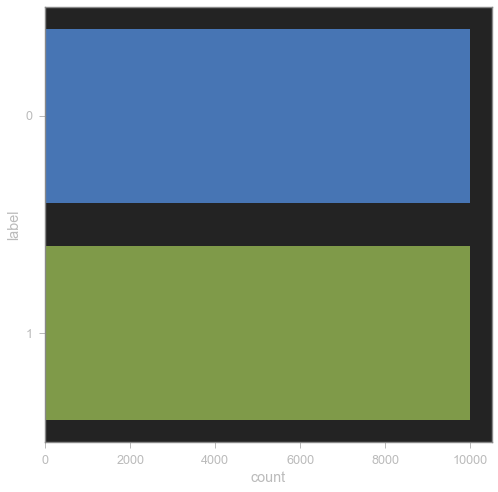

In [ ]:
#plot the number of samples in 'subject'
plt.figure(figsize =    (8,8))
sns.countplot(y = 'label', data = df)

<AxesSubplot:xlabel='count', ylabel='subject'>

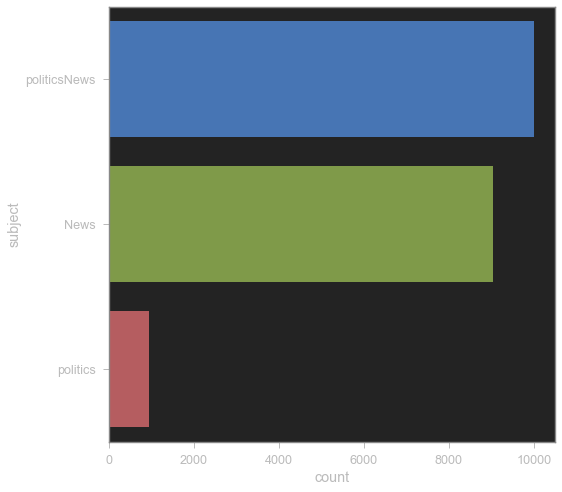

In [ ]:
plt.figure(figsize =    (8,8))
sns.countplot(y = 'subject', data = df)

Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sri.LAPTOP-7DA3Q85C\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model building - Naive Bayes Classifier

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)
prediction = NB_classifier.predict(x_test)
score = accuracy_score(y_test, prediction)
print("accuracy: {}%".format(round(score*100,2)))

#dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 97.2%


In [ ]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


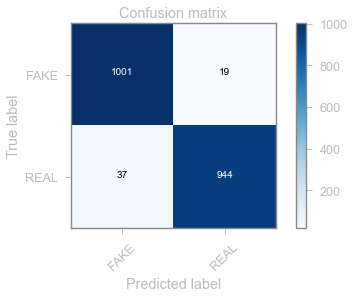

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)

score_1 = metrics.accuracy_score(y_test, pred)
print("accuracy: {}%".format(round(score_1*100,2)))

accuracy: 89.41%


Confusion matrix, without normalization


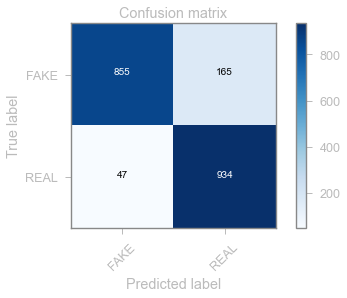

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Vadilation on an unseen datapoint

In [ ]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
#Using naive Bayes model
NB_classifier.predict(val)

array([0], dtype=int64)

In [ ]:
#Using KNeighborsClassifier 
classifier.predict(val)

array([0], dtype=int64)

Save model and vectorizer

In [ ]:
import pickle

In [ ]:
if score > score_1:
    pickle.dump(NB_classifier, open('model2.pkl', 'wb'))
else:
    pickle.dumb(classifier, open('model2.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

Load model and vectorizer to predict the previous datapoint

In [ ]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))

In [ ]:
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [ ]:
val_pkl = joblib_vect.transform([review]).toarray()

In [ ]:
joblib_model.predict(val_pkl)

array([0], dtype=int64)